## Importer les librairies utiles

In [93]:
# Librairie pour la gestion des dates
from datetime import datetime

# Librairies permettant de charger et de manipuler les données
import numpy as np
import pandas as pd

# Methode permetant d'identifier
from sklearn.impute import MissingIndicator

# Méthodes permettants de remplacer des valeurs manquantes avec sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Méthodes permettant de convertir des variables quatégorielles afin de le rendre exploitable à l'anlyse de données
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Importation librairie pour visualiser les données
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D


## Charger les données

In [2]:
df = pd.read_csv("3.Donnees_chargees/18052022_donnees_CENSUS.csv", delimiter = ",")

In [160]:
df.shape

(48825, 13)

In [3]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
0,41.0,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,more
1,50.0,Private,Masters,Divorced,Sales,Not-in-family,White,Female,50,United-States,more
2,24.0,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,40,United-States,less
3,27.0,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,40,United-States,less
4,50.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,less


## Décrire son jeu de données

In [4]:
# Afficher les 5 dernières lignes
df.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
48820,21.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,25,United-States,less
48821,57.0,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,less
48822,37.0,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,more
48823,20.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,11,United-States,less
48824,20.0,Private,Assoc-acdm,Never-married,Prof-specialty,Own-child,White,Female,20,United-States,less


In [5]:
# Audit des données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48825 entries, 0 to 48824
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48825 non-null  float64
 1   workclass       48825 non-null  object 
 2   education       48825 non-null  object 
 3   marital_status  48825 non-null  object 
 4   occupation      48825 non-null  object 
 5   relationship    48825 non-null  object 
 6   race            48825 non-null  object 
 7   sex             48825 non-null  object 
 8   hours_per_week  48825 non-null  int64  
 9   native_country  48825 non-null  object 
 10  classe          48825 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.1+ MB


In [6]:
df["relationship"].unique()

array(['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [7]:
# Dimensions des données
df.shape

(48825, 11)

In [8]:
for c in df.columns:
    print(c)

age
workclass
education
marital_status
occupation
relationship
race
sex
hours_per_week
native_country
classe


In [9]:
# Audit des données
df.describe(include="all")

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe
count,48825.000000,48825,48825,48825,48825,48825,48825,48825,48825.000000,48825,48825
unique,NaN,8,16,7,14,6,5,2,NaN,41,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,less
freq,NaN,36694,15778,22371,8979,19709,41749,32638,NaN,44674,37144
mean,38.641639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.422038,NaN,NaN
std,13.710137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.391417,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [10]:
# Audit des données 
df.describe()

,age,hours_per_week
count,48825.000000,48825.000000
mean,38.641639,40.422038
std,13.710137,12.391417
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [11]:
# Vérifier les valeurs à NaN
pd.isnull(df).sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
classe            0
dtype: int64

In [12]:
# Visualiser les colonnes objects 
df.select_dtypes(include=["O"]).head(10)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,classe
0,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,more
1,Private,Masters,Divorced,Sales,Not-in-family,White,Female,United-States,more
2,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,United-States,less
3,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,United-States,less
4,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,less
5,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,more
6,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,more
7,Private,Bachelors,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Haiti,more
8,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,more
9,Federal-gov,Some-college,Never-married,Adm-clerical,Unmarried,White,Male,United-States,less


In [13]:
# Visualiser les catégories des colonnes objects 

col_objects = df.select_dtypes(include=["O"]).columns.tolist()
print(col_objects)
for col in col_objects:
    print(f"Nom de la colonne: {col}")
    print(df[col].describe())

    #On vérifie qu'il n'ya pas trop de valeur unique à afficher
    if df[col].nunique() < df[col].shape[0]*0.25:
        print("Frequences:")
        print(df[col].value_counts(dropna=False))
        print(f"Colonne unique: {df[col].unique()}")
    print("---------------------------------------------")

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'classe']
Nom de la colonne: workclass
count       48825
unique          8
top       Private
freq        36694
Name: workclass, dtype: object
Frequences:
Private             36694
Self-emp-not-inc     3861
Local-gov            3134
State-gov            1981
Self-emp-inc         1694
Federal-gov          1430
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
Colonne unique: ['State-gov' 'Private' 'Without-pay' 'Self-emp-not-inc' 'Local-gov'
 'Federal-gov' 'Self-emp-inc' 'Never-worked']
---------------------------------------------
Nom de la colonne: education
count       48825
unique         16
top       HS-grad
freq        15778
Name: education, dtype: object
Frequences:
HS-grad         15778
Some-college    10875
Bachelors        8022
Masters          2656
Assoc-voc        2060
11th             1810
Assoc-acdm       1601
10th             1388
7th-

## Analyser son jeu de données

**Contexte:**

Le salaire moyen d’un américain s’élève à plus de 45 284 $ annuel.

Il s’agit du niveau le plus élevé parmi les pays de l’OCDE selon les derniers chiffres avancés en juillet 2021.

Pourtant malgré cette moyenne élevée, les inégalités restent très importantes au sein de la population.

Quels sont donc les paramètres qui expliquent à venir ces différences de revenus?

Le United States Census Bureau (l’équivalent de l’INSEE en France ) a réalisé un
sondage à grande échelle parmi la population active.

**Votre mission sera de mettre en évidence l’influence des critères sociaux économiques
qui sont à l’origine de ces disparités.**

In [14]:
df.dtypes

age               float64
workclass          object
education          object
marital_status     object
occupation         object
relationship       object
race               object
sex                object
hours_per_week      int64
native_country     object
classe             object
dtype: object

In [15]:
# Génrerer un rapport sur l'ensemble des variables
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report", explorative=True)
profile.to_file("./univers2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 361.36it/s]


In [109]:
# Tracer plotbar d'une variable
def bar_plot(variable):
    plt.figure(figsize=(10,5))

    df[variable].value_counts(normalize=True).plot(kind="bar")
    plt.ylabel("Proportion")
    plt.title("Distribution de: "+str(variable))
    return plt.show()

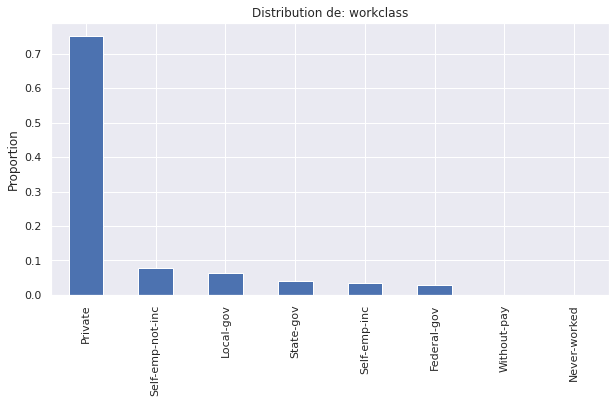

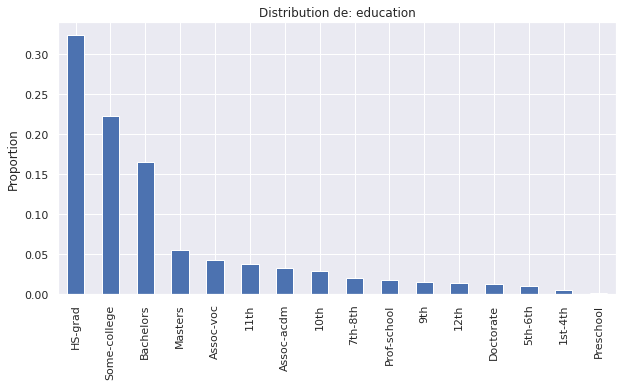

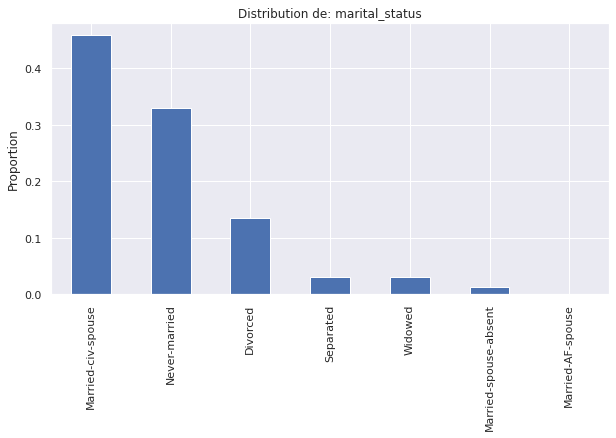

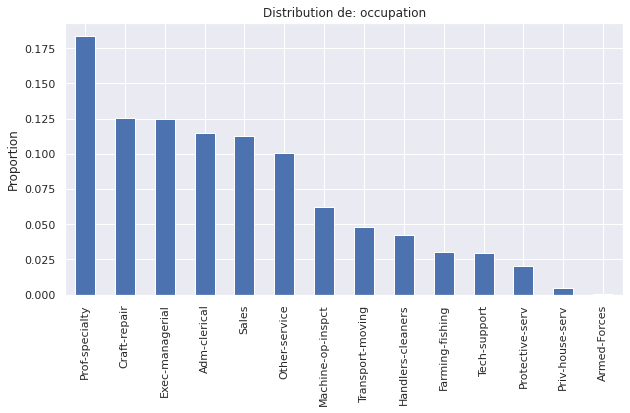

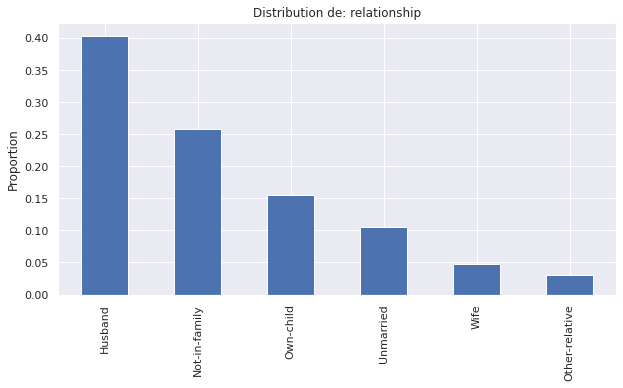

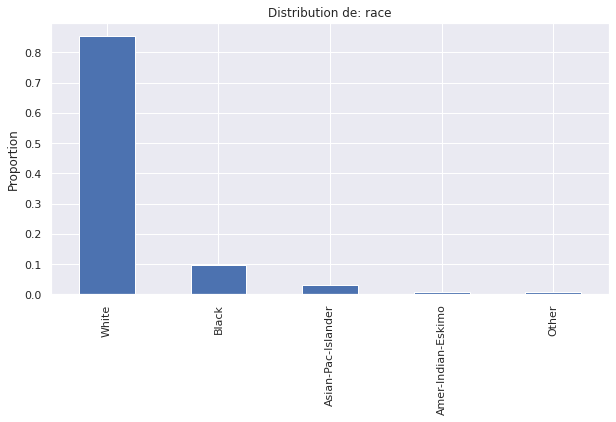

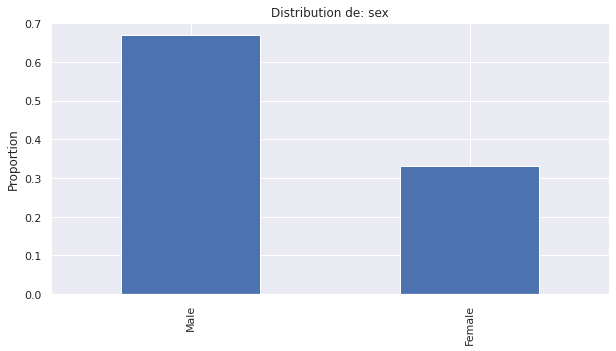

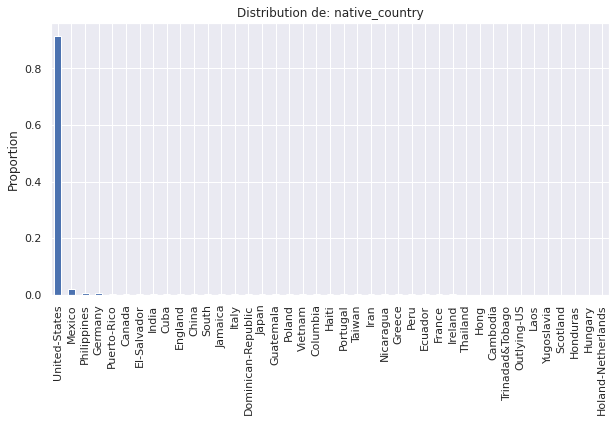

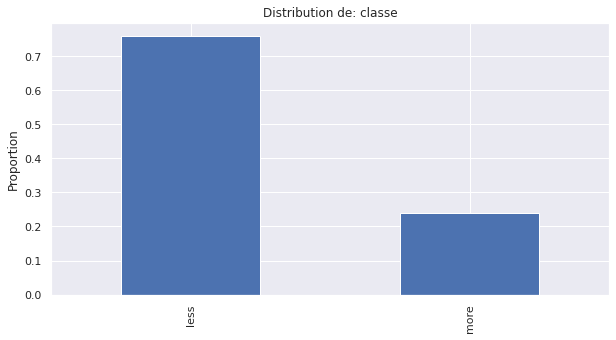

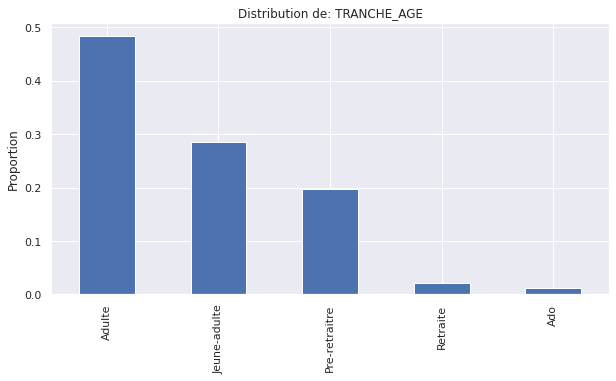

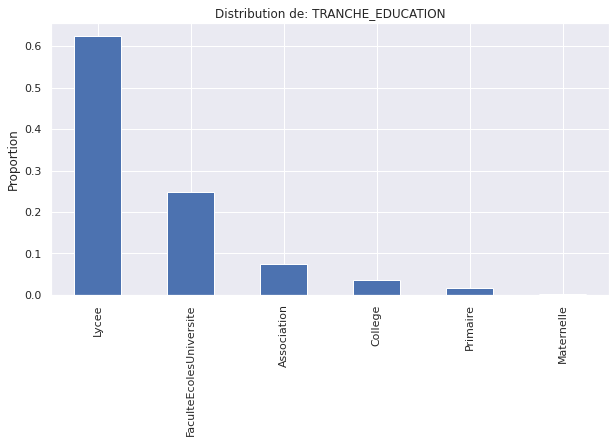

In [110]:
# Visualiser en plotbar nos variables

for column in df.select_dtypes("O").columns:
    bar_plot(column)

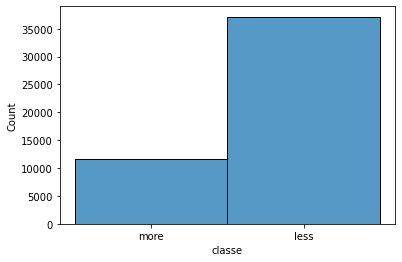

In [18]:
# Visualiser les classes
_ = sns.histplot(df["classe"])

In [121]:
# Proportion des classes
total = len(df)
print("less", round((df[(df["classe"]=="less")]["classe"].count()/total)*100,2))
print("more", round((df[(df["classe"]=="more")]["classe"].count()/total)*100,2))

less 76.08
more 23.92


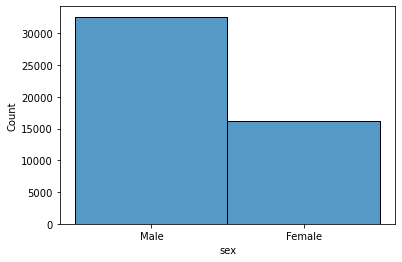

In [19]:
# Visualiser les sexes
_ = sns.histplot(df["sex"])

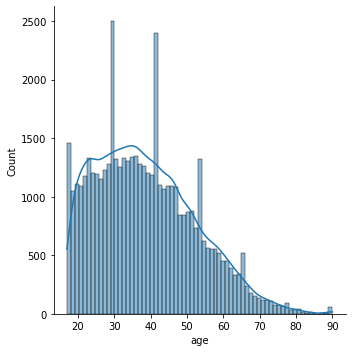

In [20]:
# Visualiser les ages

_ = sns.displot(data=df["age"], kde=True)

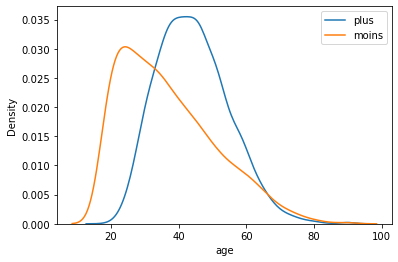

In [21]:
# Visualiser les ages en fonction des classes

_ = sns.kdeplot(df["age"][df["classe"]=="more"], bw_method=0.2, label="plus")
_ = sns.kdeplot(df["age"][df["classe"]=="less"], bw_method=0.2, label="moins")
plt.legend()

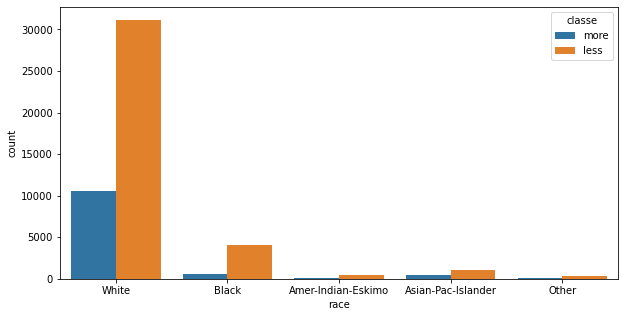

In [22]:
# Visualiser les races en fonction des classes

plt.figure(figsize=(10,5))
_ = sns.countplot(x="race", hue="classe", data=df) 

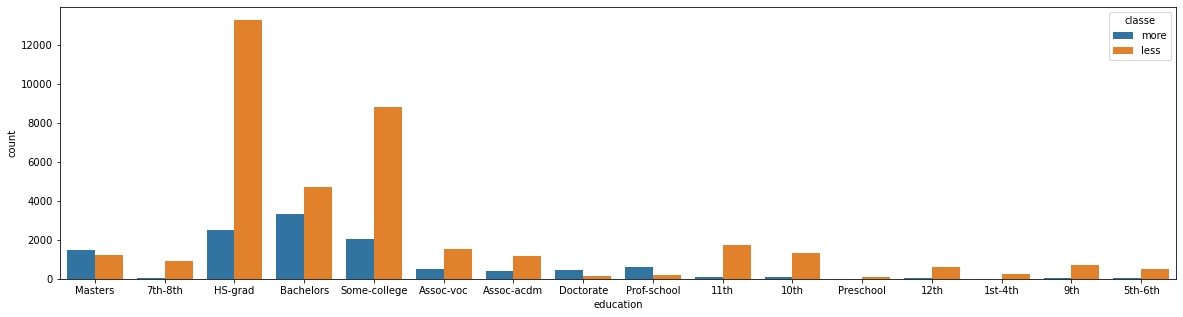

In [23]:
# Visualiser les educations en fonction des classes

plt.figure(figsize=(20,5))
_ = sns.countplot(x="education", hue="classe", data=df) 

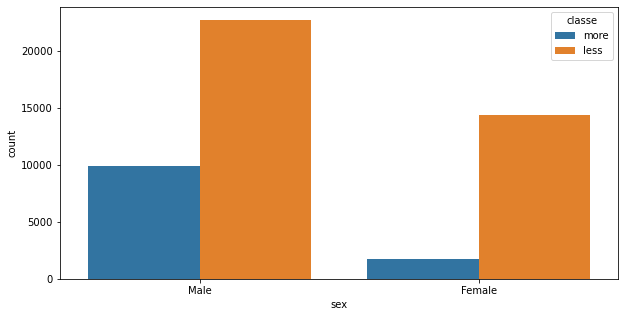

In [24]:
# Visualiser les sexes en fonction des classes

plt.figure(figsize=(10,5))
_ = sns.countplot(x="sex", hue="classe", data=df) 

In [114]:
df["marital_status"].unique()

array(['Married-civ-spouse', 'Divorced', 'Separated', 'Never-married',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

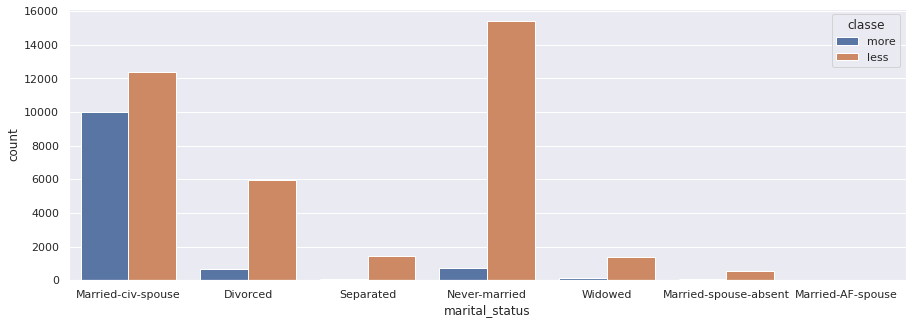

In [116]:
# Visualiser les marital_status en fonction des classes

plt.figure(figsize=(15,5))
_ = sns.countplot(x="marital_status", hue="classe", data=df, order=['Married-civ-spouse', 'Divorced', 'Separated', 'Never-married',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']) 

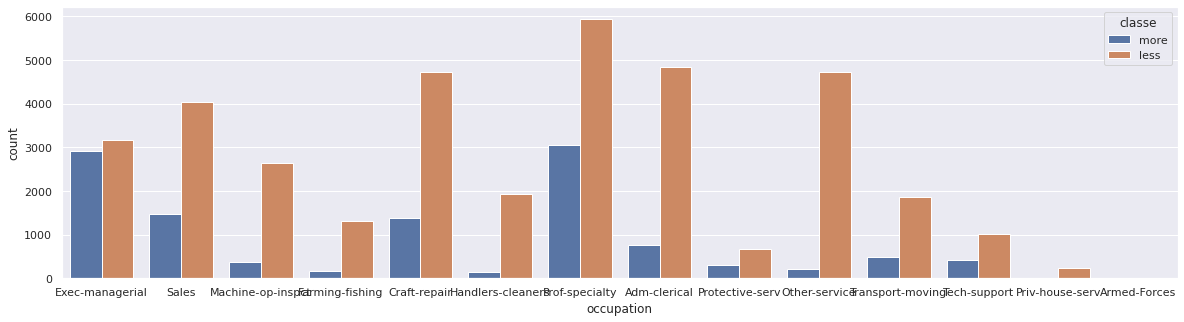

In [117]:
# Visualiser les occupations en fonction des classes

plt.figure(figsize=(20,5))
_ = sns.countplot(x="occupation", hue="classe", data=df)

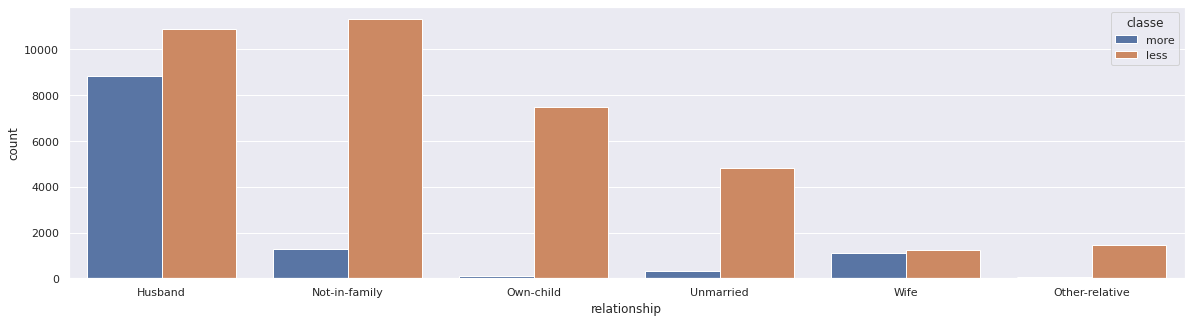

In [118]:
# Visualiser les relationship en fonction des classes

plt.figure(figsize=(20,5))
_ = sns.countplot(x="relationship", hue="classe", data=df)

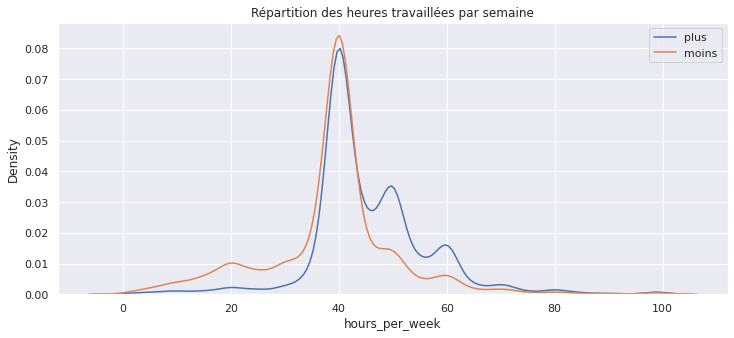

In [145]:
# Visualiser les hours_per_week en fonction des classes
plt.figure(figsize=(12,5))

_ = sns.kdeplot(df["hours_per_week"][df["classe"]=="more"], bw_method=0.2, label="plus")
_ = sns.kdeplot(df["hours_per_week"][df["classe"]=="less"], bw_method=0.2, label="moins")
plt.title("Répartition des heures travaillées par semaine")
plt.legend()

In [29]:
df["education"].unique()

array(['Masters', '7th-8th', 'HS-grad', 'Bachelors', 'Some-college',
       'Assoc-voc', 'Assoc-acdm', 'Doctorate', 'Prof-school', '11th',
       '10th', 'Preschool', '12th', '1st-4th', '9th', '5th-6th'],
      dtype=object)

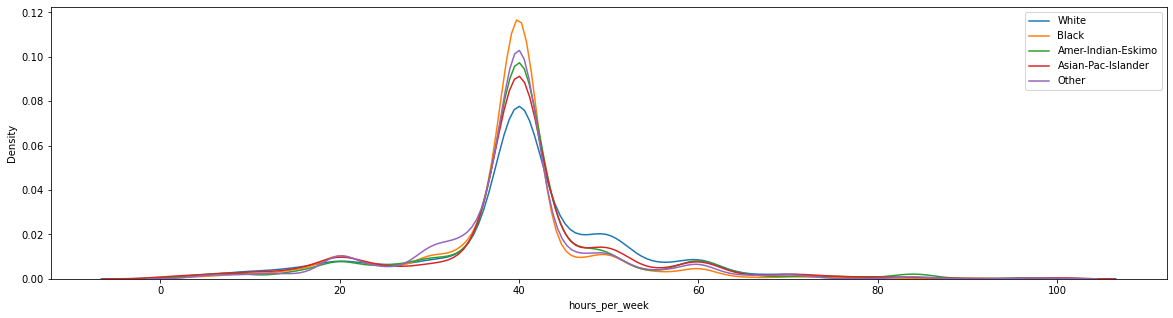

In [30]:
plt.figure(figsize=(20,5))

for edu in df["race"].unique():
    _ = sns.kdeplot(df["hours_per_week"][df["race"]==edu], bw_method=0.2, label=edu)
plt.legend()

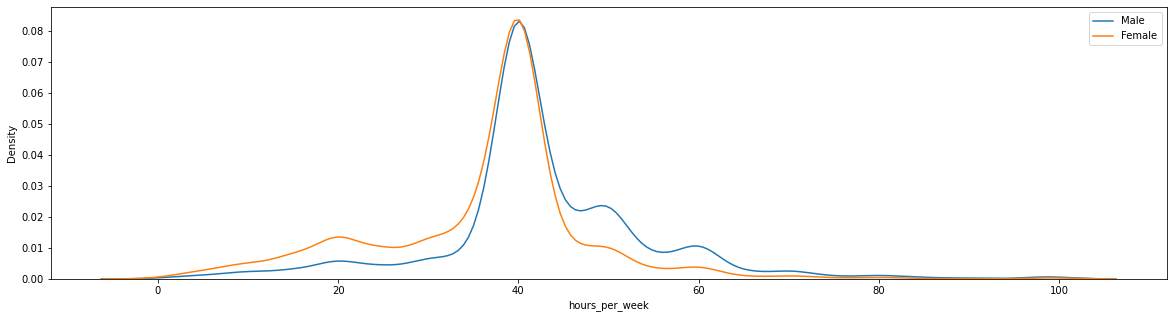

In [31]:
plt.figure(figsize=(20,5))

for edu in df["sex"].unique():
    _ = sns.kdeplot(df["hours_per_week"][df["sex"]==edu], bw_method=0.2, label=edu)
plt.legend()

In [32]:
df.select_dtypes("O").columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'classe'],
      dtype='object')

#### Creation d'indicateurs

In [87]:
# Créer des tranches d'âges
conditionlist = [
    (df["age"] < 18),
    ((df["age"] >= 18) & (df["age"] < 30)),
    ((df["age"] >= 30) & (df["age"] < 50 )),
    ((df["age"] >= 50) & (df["age"] < 70) ),
    ((df["age"] >= 70) )
    ]

choicelist = ["Ado", "Jeune-adulte", "Adulte", "Pre-retraitre", "Retraite"]

df["TRANCHE_AGE"] = np.select(conditionlist, choicelist, default="Inconnu")
df["TRANCHE_AGE"].value_counts(normalize=True).round(3)*100

Adulte           48.4
Jeune-adulte     28.5
Pre-retraitre    19.8
Retraite          2.1
Ado               1.2
Name: TRANCHE_AGE, dtype: float64

Text(0.5, 1.0, 'Répartition de la population par âge')

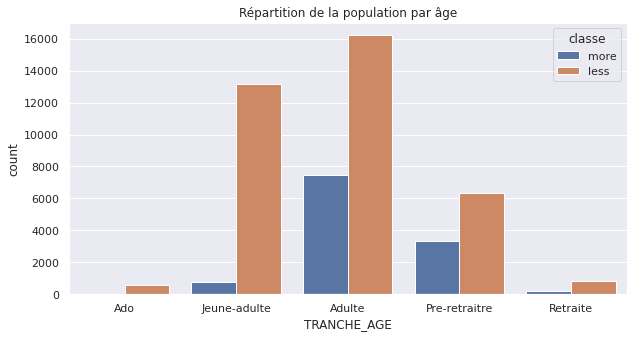

In [88]:
plt.figure(figsize=(10,5))

# Visualisation des tranches d'ages en fonction des classes
_ = sns.countplot(x="TRANCHE_AGE", hue="classe", data=df, order=["Ado", "Jeune-adulte", "Adulte", "Pre-retraitre", "Retraite"]) 
plt.title("Répartition de la population par âge")

In [67]:
df.education.unique()

array(['Masters', '7th-8th', 'HS-grad', 'Bachelors', 'Some-college',
       'Assoc-voc', 'Assoc-acdm', 'Doctorate', 'Prof-school', '11th',
       '10th', 'Preschool', '12th', '1st-4th', '9th', '5th-6th'],
      dtype=object)

In [78]:
# Créer des tranches educations

# Créer des tranches d'âges
conditionlist = [
    ((df["education"] == "Preschool")),
    ((df["education"] == "1st-4th") | (df["education"] == "5th-6th")),
    ((df["education"] == "7th-8th") | (df["education"] == "9th") ),
    ((df["education"] == "HS-grad") | (df["education"] == "10th") | (df["education"] == "11th") | (df["education"] == "12th") | (df["education"] == "Some-college") ),
    ((df["education"] == "Assoc-acdm")  | (df["education"] == "Assoc-voc")),
    # ((df["education"] == "Masters")  | (df["education"] == "Prof-school") | df["education"] == "Doctorate"),
    ]

choicelist = ["Maternelle", "Primaire", "College", "Lycee",  "Association"]

df["TRANCHE_EDUCATION"] = np.select(conditionlist, choicelist, default="FaculteEcolesUniversite")
df["TRANCHE_EDUCATION"].value_counts(normalize=True).round(3)*100

Lycee                      62.5
FaculteEcolesUniversite    24.8
Association                 7.5
College                     3.5
Primaire                    1.5
Maternelle                  0.2
Name: TRANCHE_EDUCATION, dtype: float64

Text(0.5, 1.0, 'Répartition de la population par education')

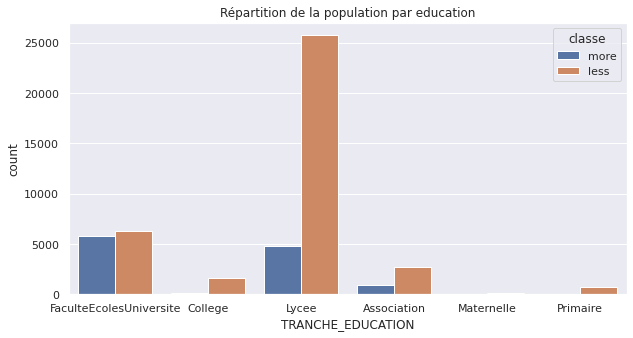

In [156]:
plt.figure(figsize=(10,5))

# Visualisation des tranches d'ages en fonction des classes
_ = sns.countplot(x="TRANCHE_EDUCATION", hue="classe", data=df) 
plt.title("Répartition de la population par education")

Text(0.5, 1.0, 'Répartition des heures travaillées par Education')

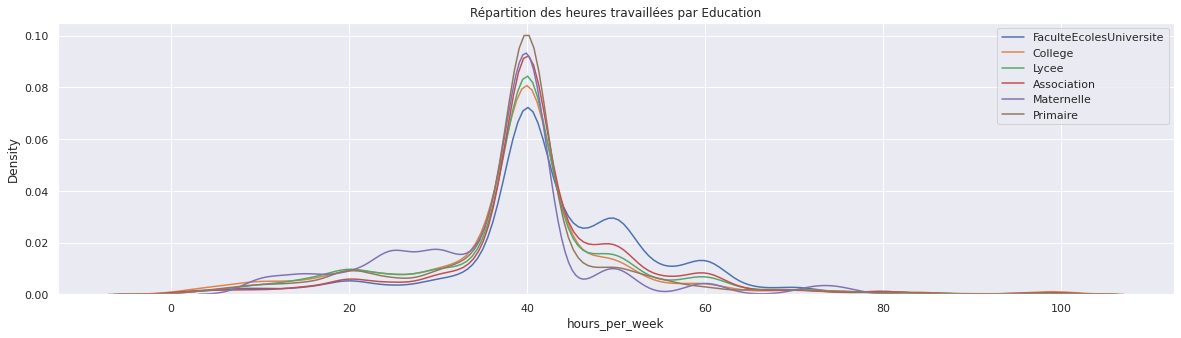

In [159]:
plt.figure(figsize=(20,5))

for edu in df["TRANCHE_EDUCATION"].unique():
    _ = sns.kdeplot(df["hours_per_week"][df["TRANCHE_EDUCATION"]==edu], bw_method=0.2, label=edu)
plt.legend()
plt.title("Répartition des heures travaillées par Education")

#### Encoder les données categorielles

In [149]:
df2 = df.copy()

In [151]:
enc  = LabelEncoder()
for column in df2.select_dtypes("O").columns:
    inds = enc.fit_transform(df2[column])
    df2[column] = inds

df2


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe,TRANCHE_AGE,TRANCHE_EDUCATION
0,41.0,6,12,2,3,0,4,1,50,38,1,1,2
1,50.0,3,12,0,11,1,4,0,50,38,1,3,2
2,24.0,3,5,5,6,3,4,1,40,38,0,2,1
3,27.0,7,11,4,4,3,4,0,40,38,0,2,3
4,50.0,3,11,2,2,0,4,1,40,38,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,21.0,3,15,4,7,3,4,0,25,38,0,2,3
48821,57.0,3,15,4,10,1,4,1,40,38,0,3,3
48822,37.0,3,9,2,11,0,4,1,60,38,1,1,2
48823,20.0,3,15,4,7,3,4,0,11,38,0,2,3


#### Correlation entre les variables

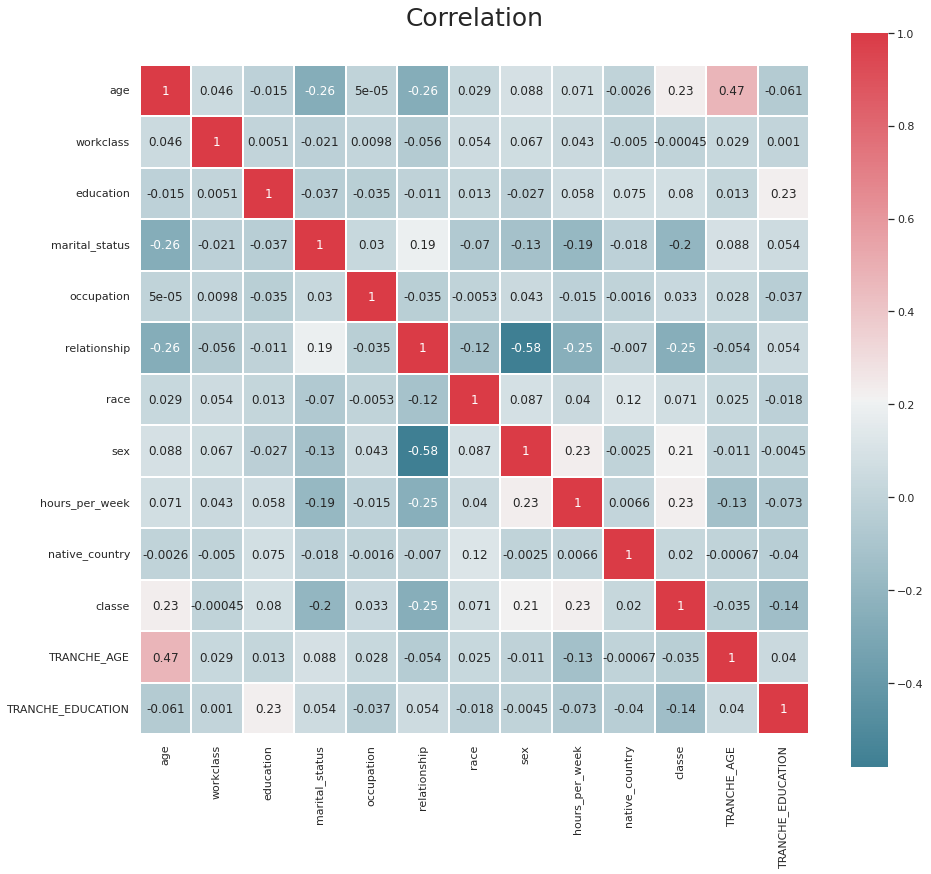

In [152]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(15, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation', y=1.05, size=25)

correlation_heatmap(df2)

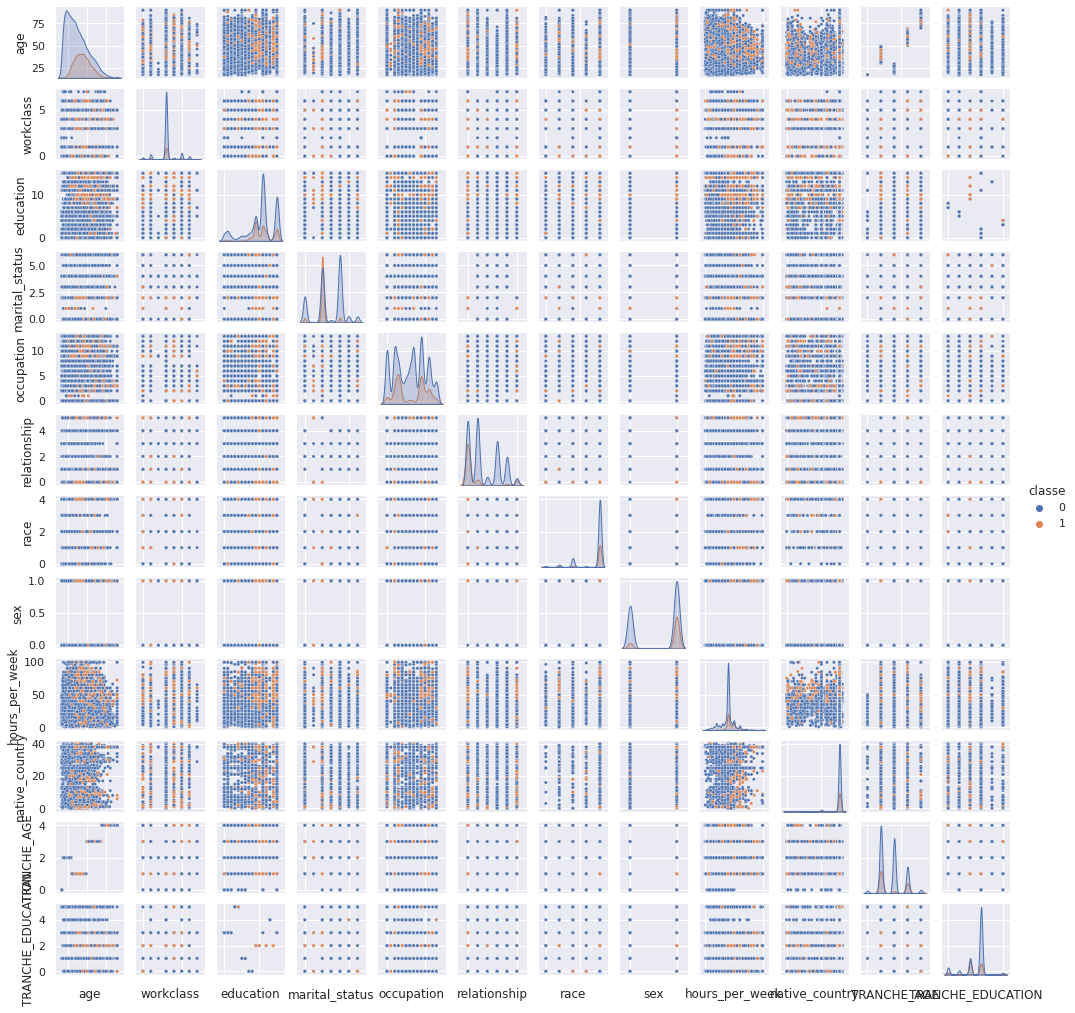

In [153]:
pp = sns.pairplot(df2, hue = 'classe', palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

#### Création de nouveaux indicateurs

<AxesSubplot:xlabel='TRANCHE_AGE', ylabel='hours_per_week'>

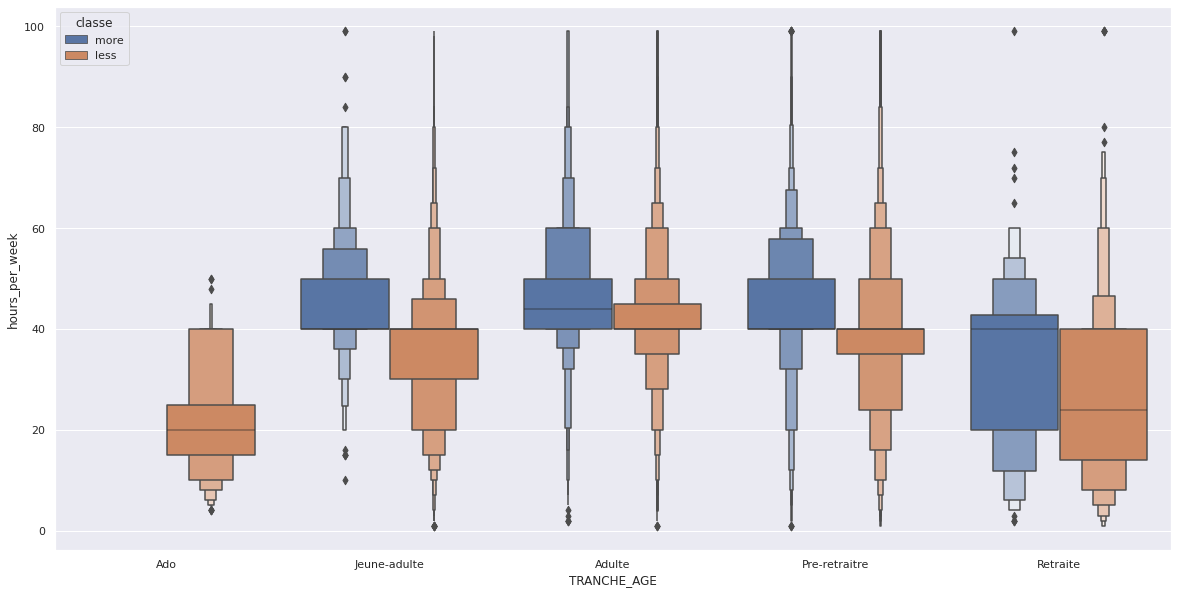

In [104]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,10))


# ax.set_xlabel("age")
# ax.set_ylabel("heure")

# sns.scatterplot(data = df2, x = "test_age", y = "hours_per_week", hue = "classe", )
# sns.boxplot(data = df2, y = "education", x = "hours_per_week", hue = "classe", orient="h")
# sns.boxplot(data = df2, x = "education", y = "hours_per_week", hue = "classe", )
# sns.scatterplot(data = df2, x = "education", y = "hours_per_week", hue = "classe" )
# sns.relplot(x="age", y="hours_per_week", hue="classe", data=df2);

# sns.violinplot(data=df2, x="TRANCHE_AGE", y="hours_per_week", hue="classe",order=["Ado", "Jeune-adulte", "Adulte", "Pre-retraitre", "Retraite"])
sns.boxenplot(data=df, x="TRANCHE_AGE", y="hours_per_week", hue="classe",order=["Ado", "Jeune-adulte", "Adulte", "Pre-retraitre", "Retraite"])
# sns.boxplot(data=df, x="race", y="hours_per_week", hue="classe")



<AxesSubplot:xlabel='TRANCHE_AGE', ylabel='hours_per_week'>

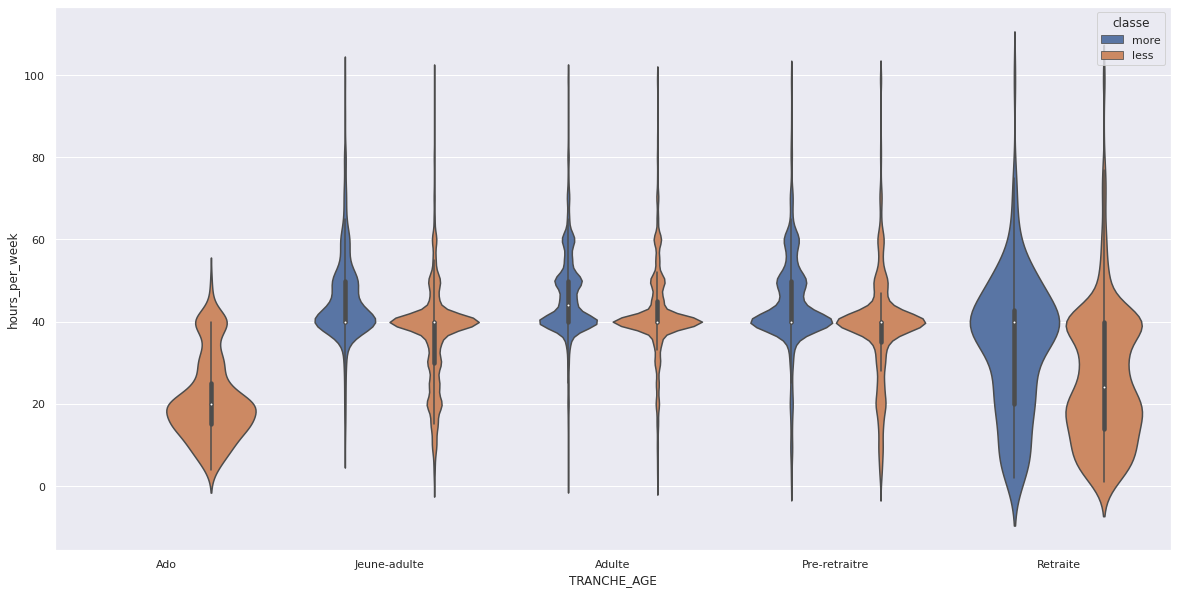

In [147]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,10))



sns.violinplot(data=df, x="TRANCHE_AGE", y="hours_per_week", hue="classe",order=["Ado", "Jeune-adulte", "Adulte", "Pre-retraitre", "Retraite"])

Text(0.5, 1.0, "Nombre heures travaillées par semaine en fonction de l'éducation")

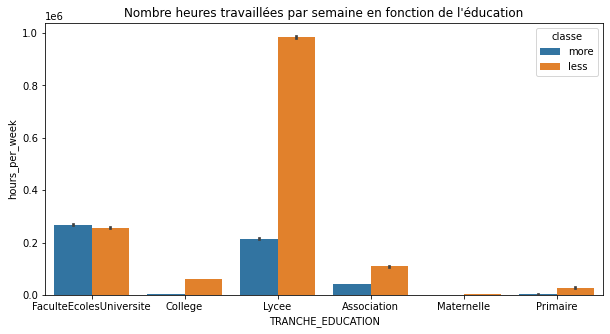

In [82]:
fig = plt.figure(figsize=(10,5))

bar2 = sns.barplot(x="TRANCHE_EDUCATION", y="hours_per_week", data=df, hue="classe", estimator=np.sum)
plt.title("Nombre heures travaillées par semaine en fonction de l'éducation")


In [99]:
# Répartition en pourcentage des heures tavaillées
total = df["hours_per_week"].sum()

educs = df["TRANCHE_EDUCATION"].unique()
classes = df["classe"].unique()

for educ in educs:
    for classe in classes:
        print(educ, classe, round((df[(df["TRANCHE_EDUCATION"]==educ) & (df["classe"]==classe)]["hours_per_week"].sum()/total)*100,2),"%")


FaculteEcolesUniversite more 13.56 %
FaculteEcolesUniversite less 12.99 %
College more 0.25 %
College less 3.11 %
Lycee more 10.91 %
Lycee less 49.89 %
Association more 2.1 %
Association less 5.56 %
Maternelle more 0.0 %
Maternelle less 0.15 %
Primaire more 0.08 %
Primaire less 1.41 %


In [107]:
df[ (df["race"] =="Black") | (df["race"]=="White" )]

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,classe,TRANCHE_AGE,TRANCHE_EDUCATION
0,41.0,State-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,more,Adulte,FaculteEcolesUniversite
1,50.0,Private,Masters,Divorced,Sales,Not-in-family,White,Female,50,United-States,more,Pre-retraitre,FaculteEcolesUniversite
2,24.0,Private,7th-8th,Separated,Machine-op-inspct,Own-child,White,Male,40,United-States,less,Jeune-adulte,College
3,27.0,Without-pay,HS-grad,Never-married,Farming-fishing,Own-child,White,Female,40,United-States,less,Jeune-adulte,Lycee
4,50.0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,less,Pre-retraitre,Lycee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,21.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,25,United-States,less,Jeune-adulte,Lycee
48821,57.0,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,less,Pre-retraitre,Lycee
48822,37.0,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,more,Adulte,FaculteEcolesUniversite
48823,20.0,Private,Some-college,Never-married,Other-service,Own-child,White,Female,11,United-States,less,Jeune-adulte,Lycee


Text(0.5, 1.0, "Nombre heures travaillées par semaine en fonction de l'ethnie")

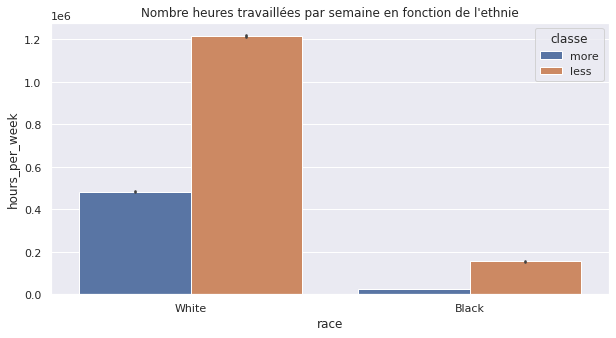

In [108]:
# Nombre heures travaillées par semaine en fonction de l'ethnie

fig = plt.figure(figsize=(10,5))

bar2 = sns.barplot(x="race", y="hours_per_week", data=df[ (df["race"] =="Black") | (df["race"]=="White" )], hue="classe", estimator=np.sum)
plt.title("Nombre heures travaillées par semaine en fonction de l'ethnie")

In [138]:
# Détail black/white 
total = df["hours_per_week"].sum() 

total_white =df[(df["race"]=="White")]["hours_per_week"].sum() 
print("White", "less", round((df[(df["race"]=="White") & (df["classe"]=="less")]["hours_per_week"].sum()/total_white)*100,2))
print("White", "more", round((df[(df["race"]=="White") & (df["classe"]=="more")]["hours_per_week"].sum()/total_white)*100,2))
print("White", "generale", round((df[(df["race"]=="White")]["hours_per_week"].sum()/total)*100,2))

print("-----------")

total_black =df[(df["race"]=="Black")]["hours_per_week"].sum() 
print("Black", "less", round((df[(df["race"]=="Black") & (df["classe"]=="less")]["hours_per_week"].sum()/total_black)*100,2))
print("Black", "more", round((df[(df["race"]=="Black") & (df["classe"]=="more")]["hours_per_week"].sum()/total_black)*100,2))
print("Black", "generale", round((df[(df["race"]=="Black")]["hours_per_week"].sum()/total)*100,2))


White less 71.55
White more 28.45
White generale 86.01
-----------
Black less 86.15
Black more 13.85
Black generale 9.15


Text(0.5, 1.0, 'Nombre heures travaillées par semaine en fonction du sexe')

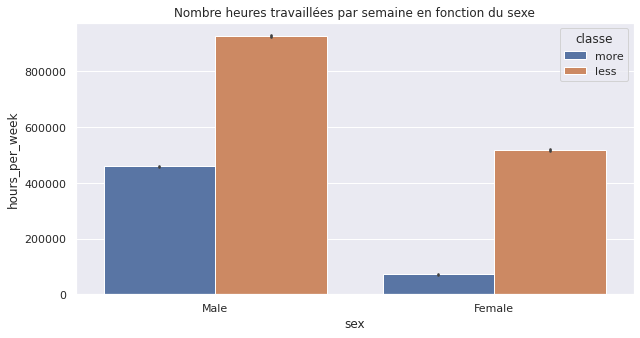

In [130]:
# Nombre heures travaillées par semaine en fonction du sex

fig = plt.figure(figsize=(10,5))

bar2 = sns.barplot(x="sex", y="hours_per_week", data=df, hue="classe", estimator=np.sum)
plt.title("Nombre heures travaillées par semaine en fonction du sexe")

In [137]:
# Détail homme/femme 
total = df["hours_per_week"].sum() 
total_male =df[(df["sex"]=="Male")]["hours_per_week"].sum() 
print("male", "less", round((df[(df["sex"]=="Male") & (df["classe"]=="less")]["hours_per_week"].sum()/total_male)*100,2))
print("male", "more", round((df[(df["sex"]=="Male") & (df["classe"]=="more")]["hours_per_week"].sum()/total_male)*100,2))
print("male", "generale", round((df[(df["sex"]=="Male")]["hours_per_week"].sum()/total)*100,2))

print("-----------")

total_female =df[(df["sex"]=="Female")]["hours_per_week"].sum() 
print("female", "less", round((df[(df["sex"]=="Female") & (df["classe"]=="less")]["hours_per_week"].sum()/total_female)*100,2))
print("female", "more", round((df[(df["sex"]=="Female") & (df["classe"]=="more")]["hours_per_week"].sum()/total_female)*100,2))
print("female", "generale", round((df[(df["sex"]=="Female")]["hours_per_week"].sum()/total)*100,2))


male less 66.85
male more 33.15
male generale 70.15
-----------
female less 87.8
female more 12.2
female generale 29.85


<AxesSubplot:xlabel='education', ylabel='hours_per_week'>

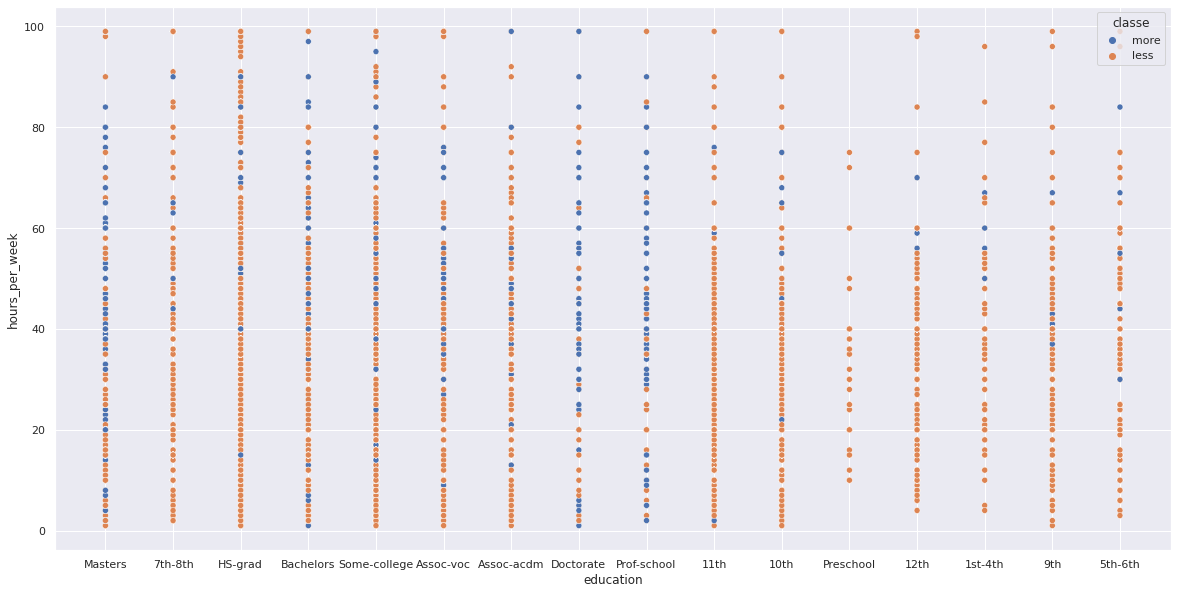

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,10))
sns.scatterplot(data = df2, x = "education", y = "hours_per_week", hue = "classe" )


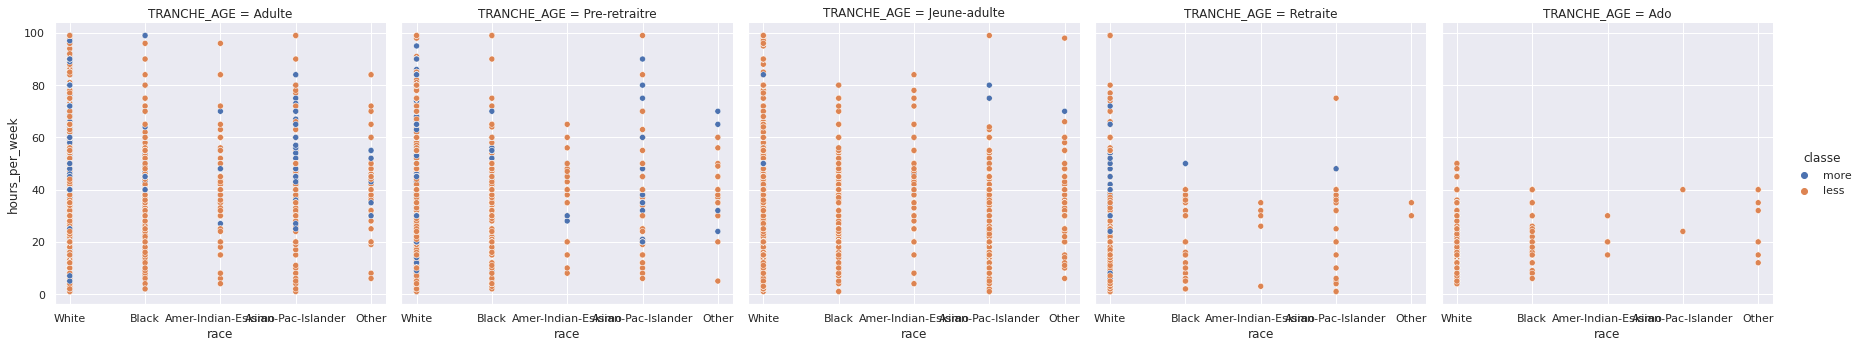

In [148]:
sns.relplot(x="race", y="hours_per_week", hue="classe", col="TRANCHE_AGE", data=df)

<AxesSubplot:xlabel='education', ylabel='hours_per_week'>

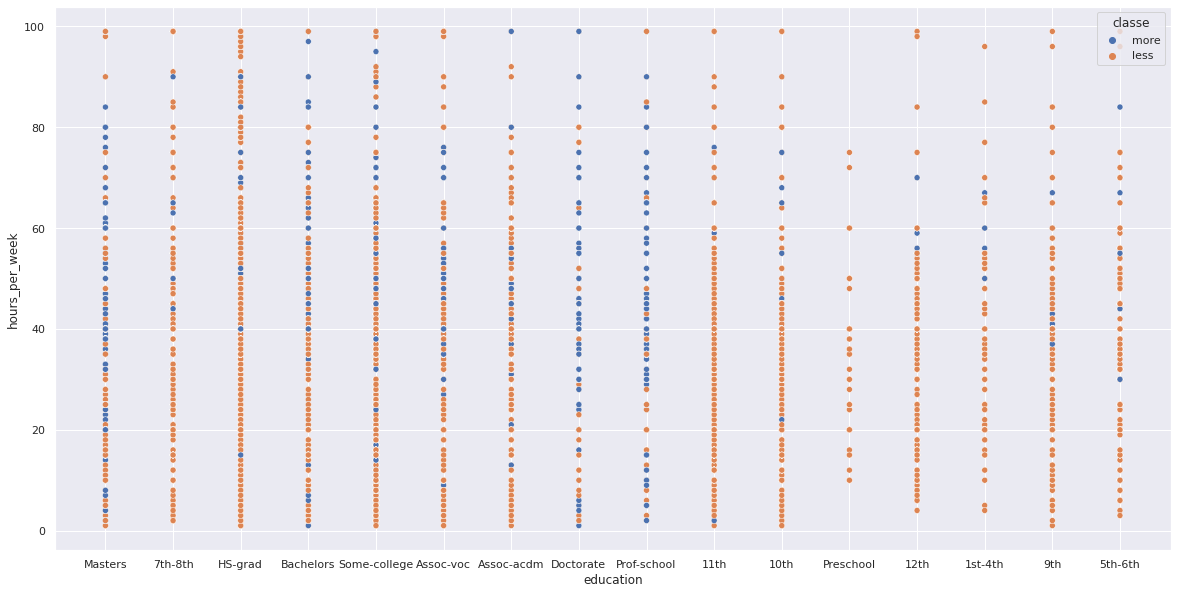

In [ ]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(data = df, x = "education", y = "hours_per_week", hue = "classe" )